# JB Music Therapy- Music and Mental Health Analysis

## 1.0. Business Understanding

### 1.1. Project overview
A survey was conducted from August to November 2022, to assess the impact of music on people's mental health and mood in general. The survey recorded responses from over 700 participants and includes details like musical preferences, listening habits, and overall state of mind. Respondents were given 16 genres of music for which they ranked the frequency of listening to each. The responses ranged from never, to very frequently. Moreover, the respondents also ranked the intensity of their feelings of anxiety, depression, insomnia, and OCD on a scale of 1 to 10. 0 being the lowest in intensity to 10 being the highest. 
Using data from the survey, this project aims to generate  insights about the correlation between  music genres and the different states of mental health of participants.

### 1.2. Problem statement
JB Music Therapy is a team of Certified Music Therapists who collaborate, design, and personalize therapy with their clients that will foster desired change: boost mood, decrease stress, strengthen relationships, increase focus, develop learning, reduce anxiety, rehab after an injury, and recover lost memories. JB Music Therapy is the largest employer of Music Therapists in Canada. The core services offered by JB Music Therapy are individual therapy, group programs and public education. The project explores the relationship between music genres and mental health. This helps in providing music recommendations that can be best used during therapy sessions.

## 2.0. Data Understanding

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
#load the data
music_df = pd.read_csv('Data/Music_and_Mental_Health_-_Survey.csv')
music_df.head()

Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29  18.0                   Spotify            3.0   
1  8/27/2022 19:57  63.0                   Pandora            1.5   
2  8/27/2022 21:28  18.0                   Spotify            4.0   
3  8/27/2022 21:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  Very frequently            Never   
1                No  ...        Sometimes           Rarely  Very frequently   
2               Yes  ...            Never           Rarely           Rarely   
3               Yes  ...        Sometimes            Never            Never   
4                No  ...  Very frequently  Very frequently            Never   

  Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  \
0                    Sometimes     3.0        0.0      1.0  0.0           NaN   
1                       Rarely     7.0        2.0      2.0  1.0           NaN   
2              Very frequently     7.0        7.0     10.0  2.0     No effect   
3                        Never     9.0        7.0      3.0  3.0       Improve   
4                       Rarely     7.0        2.0      5.0  9.0       Improve   

     Permissions  
0  I understand.  
1  I understand.  
2  I understand.  
3  I understand.  
4  I understand.  

[5 rows x 33 columns]

In [3]:
#number of rows and columns
print(f'music_df has {music_df.shape[0]} rows and {music_df.shape[1]} columns')

music_df has 736 rows and 33 columns


In [4]:
# summary of dataframe
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [5]:
#summary statistics
music_df.describe()

Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000

In [6]:
#some columns unique values
columns = ['Primary streaming service', 'Exploratory', 'Foreign languages', 'Frequency [Classical]', 'Music effects', 'Permissions']
for col in columns:
    print(f'{col.upper()}:')
    print(music_df[col].value_counts())
    print('********************************')

PRIMARY STREAMING SERVICE:
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: Primary streaming service, dtype: int64
********************************
EXPLORATORY:
Yes    525
No     211
Name: Exploratory, dtype: int64
********************************
FOREIGN LANGUAGES:
Yes    404
No     328
Name: Foreign languages, dtype: int64
********************************
FREQUENCY [CLASSICAL]:
Rarely             259
Sometimes          200
Never              169
Very frequently    108
Name: Frequency [Classical], dtype: int64
********************************
MUSIC EFFECTS:
Improve      542
No effect    169
Worsen        17
Name: Music effects, dtype: int64
********************************
PERMISSIONS:
I understand.    736
Name: Permissions, dtype: int64
********************************


Permissions column has only one unique value 'I understand'. This column can thus be dropped.

In [7]:
music_df = music_df.drop('Permissions', axis=1)

## 3.0. Data preparation

### 3.1. Check for duplicates

In [8]:
music_df.duplicated().value_counts()

False    736
dtype: int64

There are no duplicate records in the dataset.

### 3.2. Check for missing values

In [10]:
# number of missing values per column
music_df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [13]:
int(music_df['Age'].mean())

25

In [15]:
# fill missing categorical values with mode
cols = ['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Foreign languages', 'Music effects']
imp_median = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_median = imp_median.fit(music_df[cols])
music_df[cols] = imp_median.transform(music_df[cols])

# fill missing values in 'Age' and 'BPM' with the mean
music_df['Age'].fillna(int(music_df['Age'].mean()), inplace=True)
music_df['BPM'].fillna(music_df['BPM'].mean(), inplace=True)

In [16]:
#recheck for missing values
music_df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

### 3.3. Fix wrong data types

In [17]:
# convert timestamp dtype from object to datetime
music_df['Timestamp'] = pd.to_datetime(music_df['Timestamp'])
music_df['Timestamp'].dtype

dtype('<M8[ns]')

In [18]:
music_df['Timestamp']

0     2022-08-27 19:29:00
1     2022-08-27 19:57:00
2     2022-08-27 21:28:00
3     2022-08-27 21:40:00
4     2022-08-27 21:54:00
              ...        
731   2022-10-30 14:37:00
732   2022-11-01 22:26:00
733   2022-11-03 23:24:00
734   2022-11-04 17:31:00
735   2022-11-09 01:55:00
Name: Timestamp, Length: 736, dtype: datetime64[ns]

In [19]:
print(music_df['Timestamp'].min())
print(music_df['Timestamp'].max())

2022-08-27 19:29:00
2022-11-09 01:55:00


The dataset contains data from August to November 2022.

## 4.0. Exploratory data analysis

In [24]:
# correlation
music_df.corr()

Age  Hours per day       BPM   Anxiety  Depression  \
Age            1.000000      -0.044632 -0.026828 -0.176534   -0.121520   
Hours per day -0.044632       1.000000  0.040095  0.049319    0.110527   
BPM           -0.026828       0.040095  1.000000 -0.024763    0.037939   
Anxiety       -0.176534       0.049319 -0.024763  1.000000    0.519969   
Depression    -0.121520       0.110527  0.037939  0.519969    1.000000   
Insomnia       0.006920       0.141821  0.049963  0.292669    0.378996   
OCD           -0.129940       0.118729  0.017553  0.348350    0.196988   

               Insomnia       OCD  
Age            0.006920 -0.129940  
Hours per day  0.141821  0.118729  
BPM            0.049963  0.017553  
Anxiety        0.292669  0.348350  
Depression     0.378996  0.196988  
Insomnia       1.000000  0.226354  
OCD            0.226354  1.000000

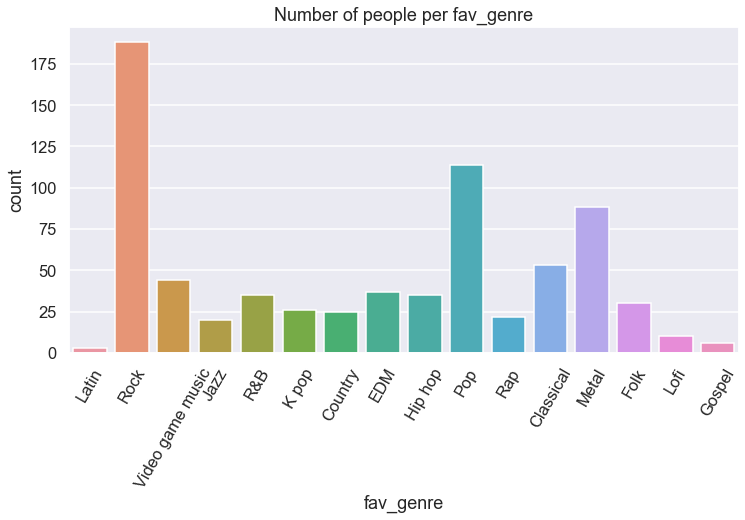

In [20]:
#countplot showing the number of people per fav_genre
sns.set(style='darkgrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x=music_df['Fav genre'])
ax.set_title('Number of people per fav_genre')
ax.set_xlabel('fav_genre')
plt.xticks(rotation=60);

The favourite genre of most participants is Rock, followed by Pop. Few participants like Lofi, Latin and Gospel genres.

In [22]:
music_df.to_csv('Data/Music_and_Mental_Health_-_Survey_cleaned.csv')

More visualizations were done using Power BI. 

### Summary of mental health  by genre frequencies

The participants with the lowest  intensity of feelings of anxiety, depression, insomnia, and OCD:

- Never listen to EDM, Folk, Hip hop, K pop, Lofi, Metal, Pop, R&B, Rap and Video game music genres.

- Rarely listen to Jazz, Latin and Rock genres.

- Sometimes listen to Country and Gospel music genres.

- Very frequently listen to Classical genres.

## 5.0. Conclusions and recommendations

- People with high levels of anxiety, depression, insomnia, and OCD should spend more hours per day listening to music.

- The music genre that should often be used during therapy sessions is  Classical.

- Other music genres that should be considered are Country and Gospel music genres.